In [1]:
import dlib

In [2]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

In [75]:
import cv2
path='/home/lab/양창희/Emotion Project/test/역겨움.jpg'
img=cv2.imread(path)
img=cv2.resize(img,(250,250),interpolation=cv2.INTER_CUBIC)

In [76]:
import matplotlib.pyplot as plt

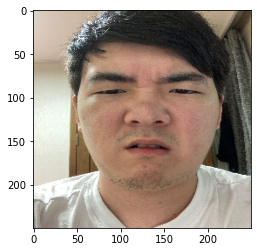

In [77]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [6]:
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
rects = detector(img1, 1)

In [7]:
for i, rect in enumerate(rects):
    print("Print_i:{} ".format(i))
    print("Print_rect:{} ".format(rect))
    print("Print_rect.left():{} ".format(rect.left()))
    print("Print_rect.top():{} ".format(rect.top()))
    print("Print_rect.bottom():{} ".format(rect.bottom()))
    print("Print_rect.right():{} ".format(rect.right()))
    print("Print_predictor(img,rect):{} ".format(predictor(img,rect)))
    print("Print_shape.part_x:{} ".format(predictor(img,rect).part(1).x))
    print("Print_shape.part_y:{} ".format(predictor(img,rect).part(1).y))

Print_i:0 
Print_rect:[(29, 47) (184, 202)] 
Print_rect.left():29 
Print_rect.top():47 
Print_rect.bottom():202 
Print_rect.right():184 
Print_predictor(img,rect):<_dlib_pybind11.full_object_detection object at 0x7f3ab8326d50> 
Print_shape.part_x:32 
Print_shape.part_y:124 


[[32, 105], [32, 124], [34, 142], [38, 160], [45, 176], [58, 190], [73, 200], [91, 208], [110, 211], [130, 208], [149, 202], [166, 193], [180, 181], [189, 165], [193, 147], [196, 129], [197, 110], [43, 92], [54, 81], [69, 78], [85, 79], [101, 84], [125, 86], [141, 82], [156, 80], [171, 82], [182, 92], [112, 99], [112, 109], [111, 120], [111, 132], [92, 142], [102, 143], [111, 146], [120, 144], [130, 142], [60, 103], [69, 102], [78, 101], [87, 103], [78, 104], [69, 104], [138, 104], [148, 102], [156, 103], [165, 104], [156, 105], [147, 104], [80, 163], [92, 160], [102, 157], [110, 159], [119, 158], [131, 160], [144, 164], [131, 170], [120, 173], [110, 173], [102, 172], [92, 169], [85, 164], [102, 163], [110, 165], [119, 164], [139, 165], [120, 164], [111, 164], [102, 163]]


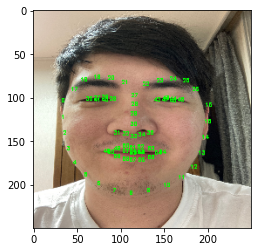

In [8]:
data=[]
for i, rect in enumerate(rects):
    l=rect.left()
    t=rect.top()
    b=rect.bottom()
    r=rect.right()
    shape=predictor(img1,rect)
    for j in range(68):
        x,y=shape.part(j).x,shape.part(j).y
        cv2.putText(img, str(j),(x,y),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,0.2,(0,255,0))
        data.append([x,y])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(data)

# data
## left brow 17~21
## right brow 23~26
## nose 27~30
## down nose 31~35
## left eye 36~41
## right eye 42~47
## mouse 48~ 67

In [10]:
import face_alignment
from skimage import io

In [ ]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cuda')

input = img
preds = fa.get_landmarks(input)

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /home/lab/.cache/torch/hub/checkpoints/s3fd-619a316812.pth


  0%|          | 0.00/85.7M [00:00<?, ?B/s]

In [17]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cuda')

input = img
preds = fa.get_landmarks(input)

In [78]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, device='cuda')

input = img
preds = fa.get_landmarks(input)

In [79]:
x=[]
y=[]
z=[]
for i in range(len(preds[0])):
    x.append(preds[0][i][0])
    y.append(preds[0][i][1])
    z.append(preds[0][i][2])

In [80]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

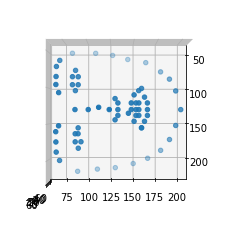

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,marker='o')
ax.view_init(90,0)

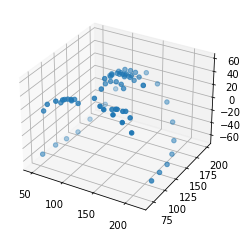

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,marker='o')

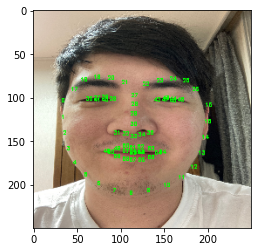

In [33]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

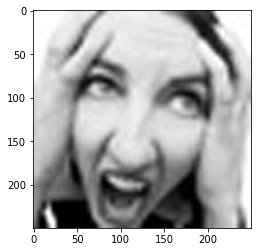

In [82]:
path='/home/lab/dataset/facial_emotion_recognition/images/validation/angry/32153.jpg'
img=cv2.imread(path)
img=cv2.resize(img,(250,250),interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [83]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, device='cuda')

input = img
preds = fa.get_landmarks(input)

In [84]:
x=[]
y=[]
for i in range(len(preds[0])):
    x.append(preds[0][i][0])
    y.append(preds[0][i][1])

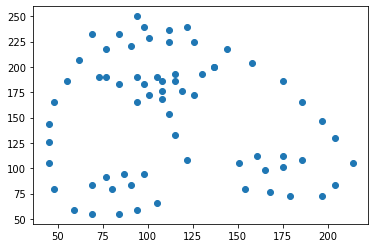

In [85]:
plt.scatter(x,y)

In [86]:
for j in range(68):
    cv2.putText(img,str(j),(x[j],y[j]),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,0.1,(0,255,0))

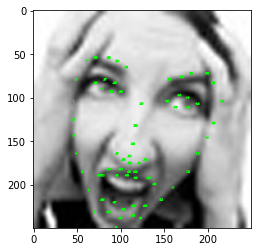

In [87]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [88]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._3D, device='cuda')

input = img
preds = fa.get_landmarks(input)

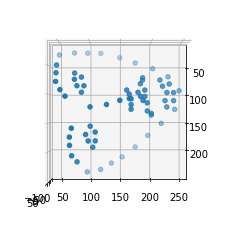

In [89]:
x=[]
y=[]
z=[]
for i in range(len(preds[0])):
    x.append(preds[0][i][0])
    y.append(preds[0][i][1])
    z.append(preds[0][i][2])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,marker='o')
ax.view_init(90,0)